## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf, arma_order_select_ic
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro, kstest
from sklearn.metrics import mean_squared_error

# **Import dan Plot Data**

In [27]:
df = pd.read_csv("seattleWeather_1948-2017.csv",delimiter=",")#.iloc[:2000]
df['DATE']=pd.to_datetime(df['DATE'])

In [53]:
df2=df[df['DATE'].dt.day==1].copy()
dfx=pd.Series(df2['TMAX'].values,index=df2['DATE'].values)
df2=pd.DataFrame({"TMAX":dfx,"DATE":dfx.index})

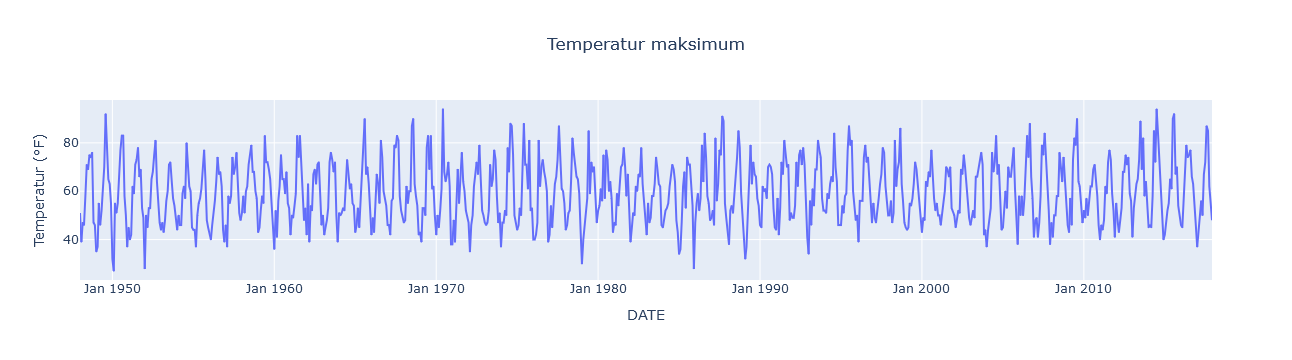

In [91]:
col = "TMAX"
dfx = pd.Series(df2[col].values, index=df2['DATE'].values)
fig = px.line(df2, x='DATE', y=col, title='Temperatur maksimum', labels={'date': 'Date', col: 'Temperatur (°F)'})
fig.update_xaxes(
    rangeslider_visible=False,
    rangeslider_thickness=0.05,
    tickformat="%b %Y",
    rangeslider_bgcolor="darkblue",
    rangeslider_borderwidth=1
)
fig.update_layout(
    title='Temperatur maksimum',
    title_x=0.5,
)
fig.show()

# **Periksa Kestasioneran Data Terhadap Variansi menggunakan Box-Cox**

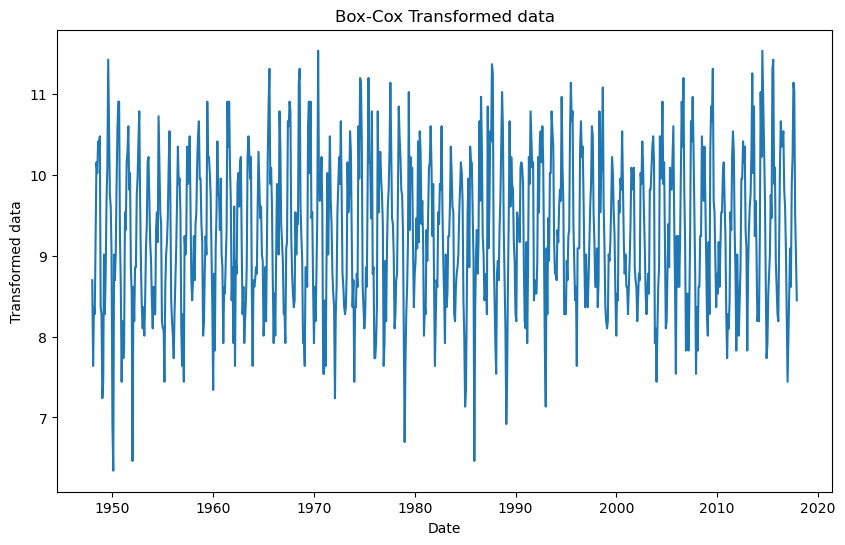

In [57]:

transformed_data, lambda_value = stats.boxcox(dfx)

# Plot data setelah transformasi
plt.figure(figsize=(10, 6))
plt.plot(pd.Series(transformed_data,index=dfx.index))
plt.title('Box-Cox Transformed data')
plt.xlabel('Date')
plt.ylabel('Transformed data')
plt.show()

In [ ]:
tmp

In [11]:
transformed_X = pd.Series(transformed_data,index=df['DATE'])

# **Transformasi Berdasarkan λ jika Data Tidak Stasioner Terhadap Variansi**

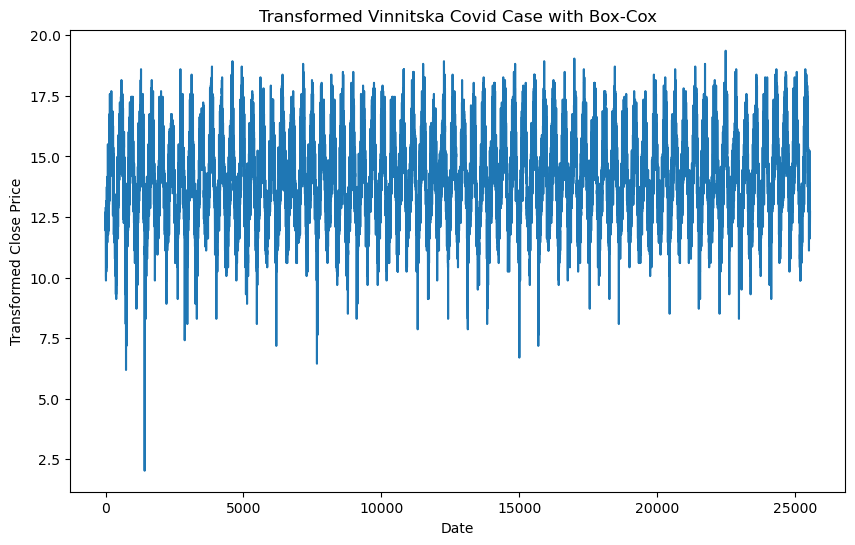

In [9]:
# Terapkan transformasi dengan lambda yang ditemukan
transformed_X = stats.boxcox(X[X > 0], lmbda=lambda_value)

# Plot data yang sudah ditransformasi
plt.figure(figsize=(10, 6))
plt.plot(transformed_X)
plt.title('Transformed Vinnitska Covid Case with Box-Cox')
plt.xlabel('Date')
plt.ylabel('Transformed Close Price')
plt.show()

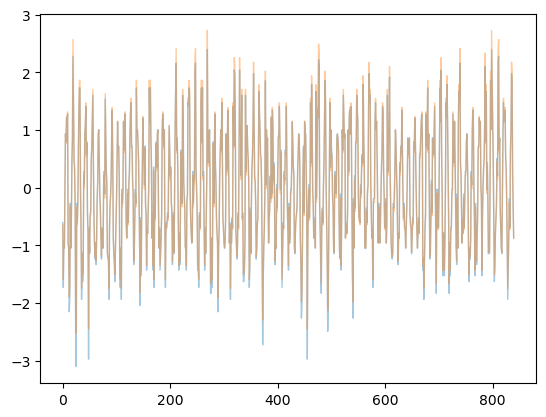

In [62]:
tmp1=(transformed_data-transformed_data.mean())/transformed_data.std()
tmp2=(dfx-dfx.mean())/dfx.std()
plt.plot(tmp1,alpha=0.4,linewidth=1)
plt.plot(tmp2.values,alpha=0.4,linewidth=1)

# **Uji ADF dan Differencing**

In [63]:
# Mengonversi kolom 'date' menjadi format datetime dan menjadikannya sebagai index

# Fungsi untuk melakukan uji ADF dan menampilkan hasil dalam tabel
def test_stationarity(series):
    result = adfuller(series.dropna())  # Menghilangkan missing values
    # Membuat dataframe untuk hasil uji ADF
    adf_result = pd.DataFrame({
        'Metric': ['ADF Statistic', 'p-value', '1% Critical Value', '5% Critical Value', '10% Critical Value', 'Stationarity'],
        'Value': [result[0], result[1], result[4]['1%'], result[4]['5%'], result[4]['10%'], 'Stasioner' if result[1] < 0.05 else 'Tidak Stasioner']
    })
    return adf_result

# Pertama, kita akan uji data tanpa differencing
print("Uji ADF pada data asli (tanpa differencing):")
adf_table = test_stationarity(dfx)
adf_table


Uji ADF pada data asli (tanpa differencing):


,Metric,Value
0,ADF Statistic,-6.40859
1,p-value,0.0
2,1% Critical Value,-3.43834
3,5% Critical Value,-2.865067
4,10% Critical Value,-2.568648
5,Stationarity,Stasioner


# **Uji ACF dan PACF**

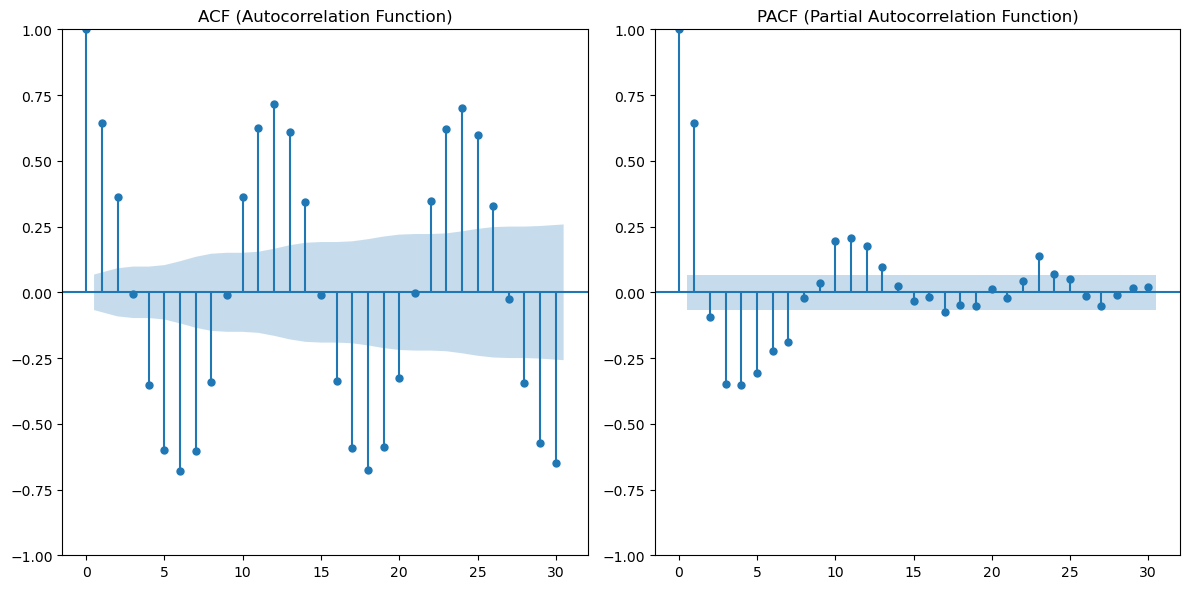

In [64]:
# Membuat ACF dan PACF untuk menentukan MA (q) dan AR (p)
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(121)
plot_acf(dfx.dropna(), ax=plt.gca())
plt.title('ACF (Autocorrelation Function)')

# Plot PACF
plt.subplot(122)
plot_pacf(dfx.dropna(), ax=plt.gca())
plt.title('PACF (Partial Autocorrelation Function)')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
P={1,7,13,17}
Q={2,8,14,20,26}

In [65]:
from tqdm import tqdm
import itertools
P_orders={1,7,13,17}
Q_orders={2,8,14,20,26}
results = []
for p, q in tqdm(itertools.product(P_orders, Q_orders)):
    try:
        # Fit the SARIMAX model
        #model = ARIMA(transformed_X.iloc[:1000], order=(40,0,12))
        #model_fit = model.fit()
        model = ARIMA(dfx.iloc[:500], order=(p, 0, q))  # Adjust (d=0) based on your data
        fit_model = model.fit()
        
        # Append results: (P, Q, AIC)
        results.append({'P': p, 'Q': q, 'AIC': fit_model.aic, 'fit_model':fit_model})
    except Exception as e:
        print(f"Model failed for P={p}, Q={q}: {e}")

0it [00:00, ?it/s]C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

1it [00:00,  4.31it/s]C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, 

In [66]:
min(results,key=lambda x:x['AIC'])

{'P': 7,
 'Q': 8,
 'AIC': 3413.19419118392,
 'fit_model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x1cdb20d2b60>}

In [ ]:
# Membuat ACF dan PACF untuk menentukan MA (q) dan AR (p)
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(121)
plot_acf(df_x[col].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF (Autocorrelation Function)')

# Plot PACF
plt.subplot(122)
plot_pacf(df_x[col].dropna(), ax=plt.gca(), lags=40)
plt.title('PACF (Partial Autocorrelation Function)')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [55]:
def identify_model(series):
    series_diff = series
    result = adfuller(series_diff)
    d=0
    while result[1] > 0.05:
        d += 1
        series_diff = series.diff().dropna()
        result = adfuller(series_diff)
    print(f"{d = }")
    # Identify p and q using AIC
    order = arma_order_select_ic(series_diff, max_ar=12, max_ma=1, ic='aic')['aic_min_order']
    return order, d

order, d = identify_model(df_x[col].dropna())
print(f"Identified order: ARIMA({order[0]}, {d}, {order[1]})")

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Identified order: ARIMA(9, 0, 1)


In [54]:
df_x

,DATE,TMAX
0,1948-01-01,51
1,1948-01-02,45
2,1948-01-03,45
3,1948-01-04,45
4,1948-01-05,45
...,...,...
25546,2017-12-10,49
25547,2017-12-11,49
25548,2017-12-12,46
25549,2017-12-13,48


In [87]:
print(results[17]['fit_model'].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(7, 0, 8)   Log Likelihood               -1689.597
Date:                Sat, 04 Jan 2025   AIC                           3413.194
Time:                        21:19:11   BIC                           3484.843
Sample:                    01-01-1948   HQIC                          3441.309
                         - 08-01-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6267      0.406    144.535      0.000      57.832      59.422
ar.L1         -1.2845      0.266     -4.827      0.000      -1.806      -0.763
ar.L2         -0.4409      0.198     -2.230      0.0

In [82]:
model = ARIMA(dfx, order=(7,0,8))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  840
Model:                 ARIMA(7, 0, 8)   Log Likelihood               -2824.780
Date:                Sat, 04 Jan 2025   AIC                           5683.560
Time:                        21:17:29   BIC                           5764.028
Sample:                    01-01-1948   HQIC                          5714.401
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2396      1.389     42.652      0.000      56.517      61.962
ar.L1          0.4019      0.126      3.178      0.001       0.154       0.650
ar.L2          0.8903      0.154      5.768      0.0

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
10 = 445 ms
20 = 968 ms
30 = 3000 ms
40 = 3870 ms
50 = 5000 ms
60 = 10 ms

In [20]:
model2 = ARIMA(transformed_X.iloc[:500], order=(20,0,3))
model_fit2 = model2.fit()
print(model_fit2.summary())

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                ARIMA(20, 0, 3)   Log Likelihood                -556.656
Date:                Fri, 03 Jan 2025   AIC                           1163.312
Time:                        23:08:14   BIC                           1268.677
Sample:                    01-01-1948   HQIC                          1204.657
                         - 05-14-1949                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7443     50.755      0.271      0.787     -85.733     113.222
ar.L1         -0.0173      0.103     -0.168      0.867      -0.219       0.185
ar.L2         -0.2143      0.095     -2.251      0.0

C:\Users\umarzein\micromamba\envs\traditional_ds\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [70]:
dfx.iloc[501:]

1989-10-01    66
1989-11-01    57
1989-12-01    54
1990-01-01    46
1990-02-01    45
              ..
2017-08-01    87
2017-09-01    85
2017-10-01    62
2017-11-01    55
2017-12-01    48
Length: 339, dtype: int64

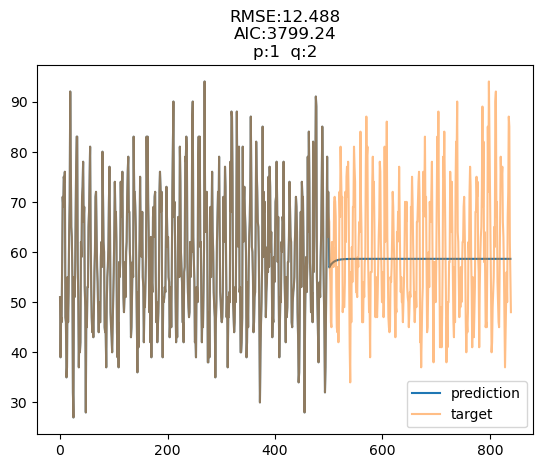

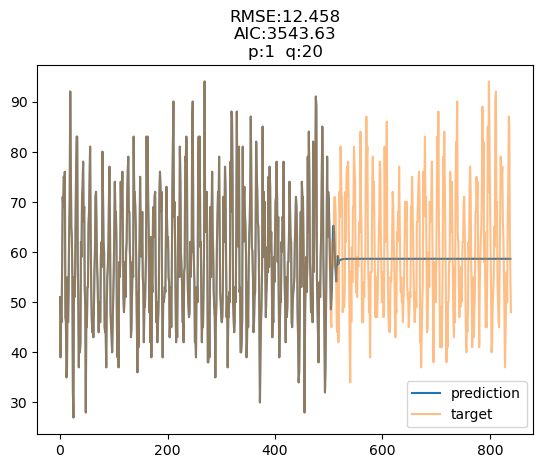

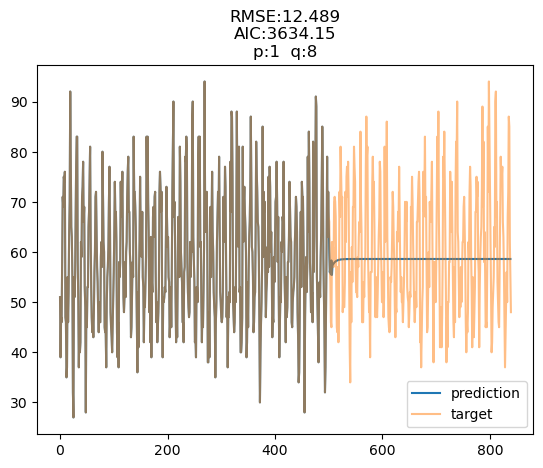

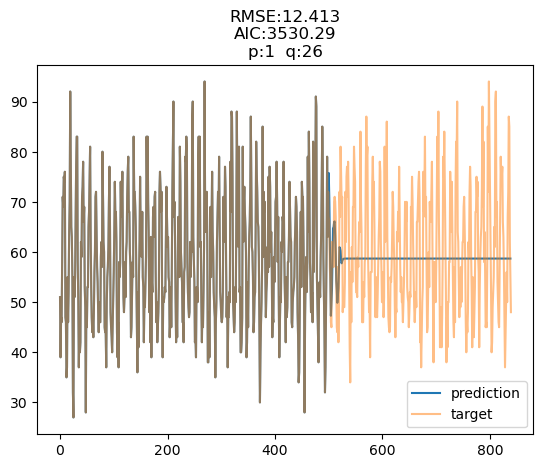

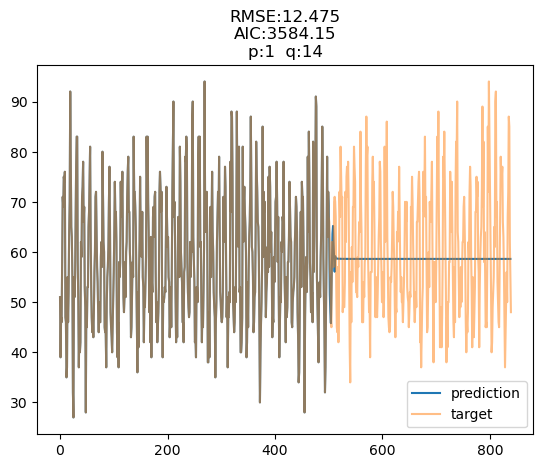

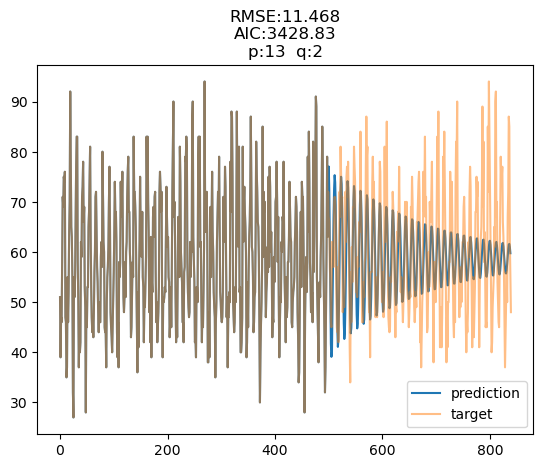

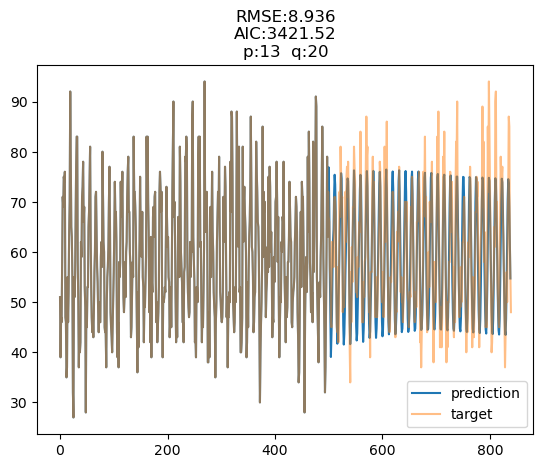

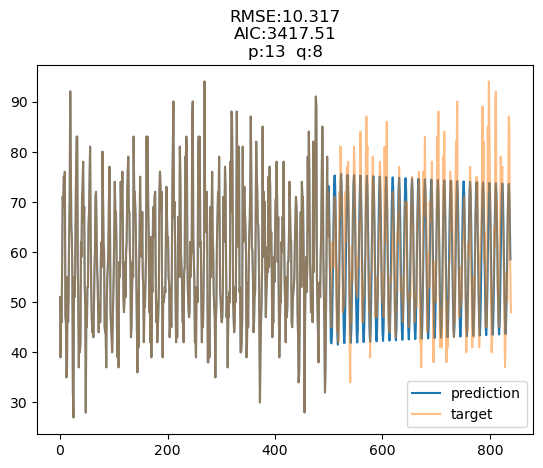

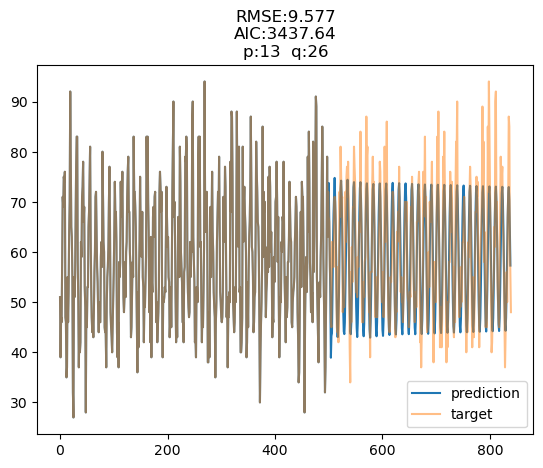

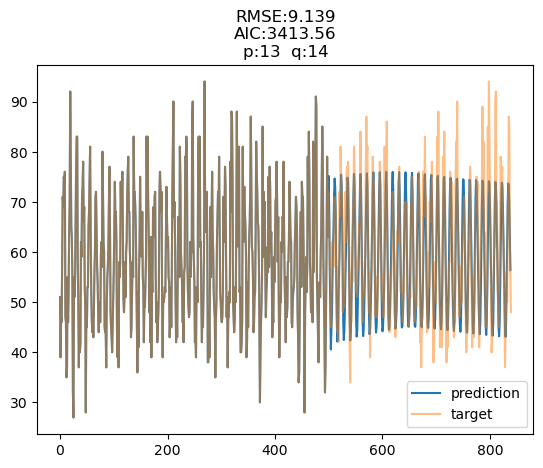

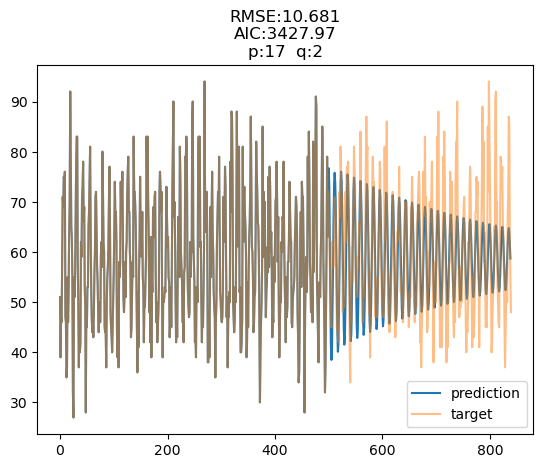

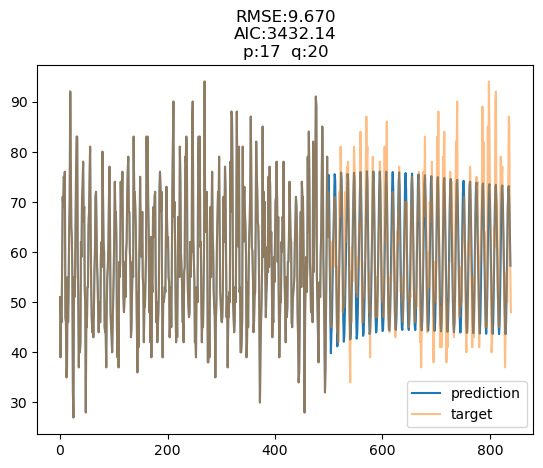

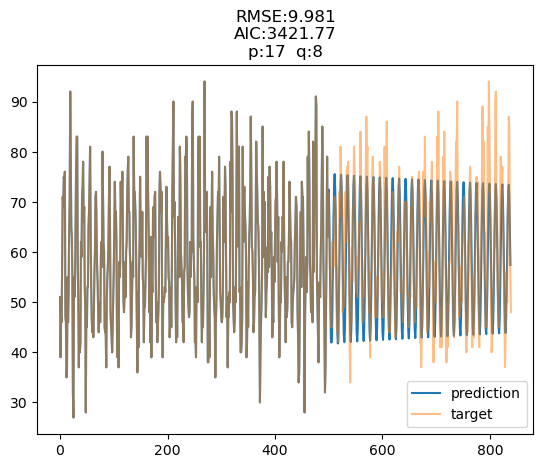

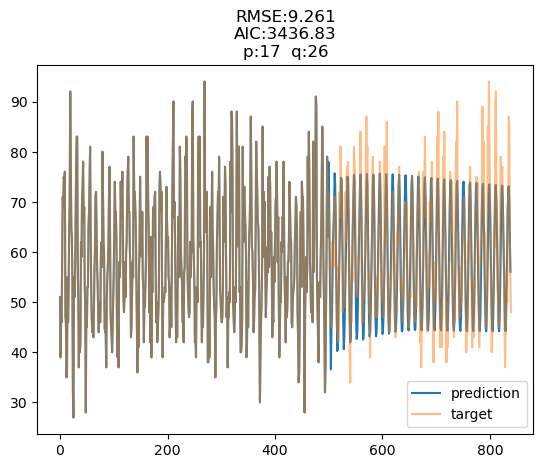

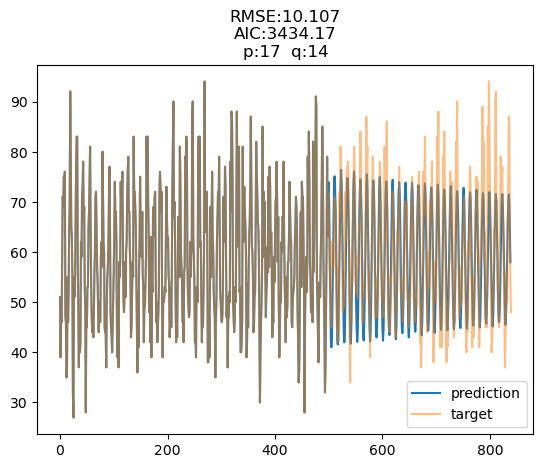

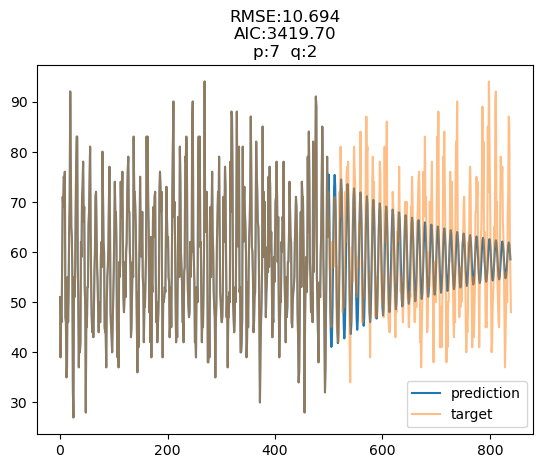

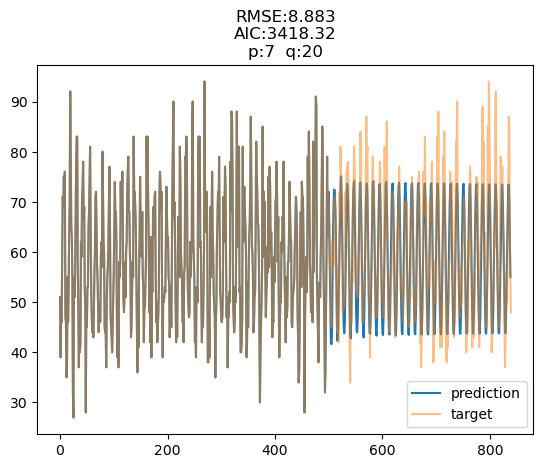

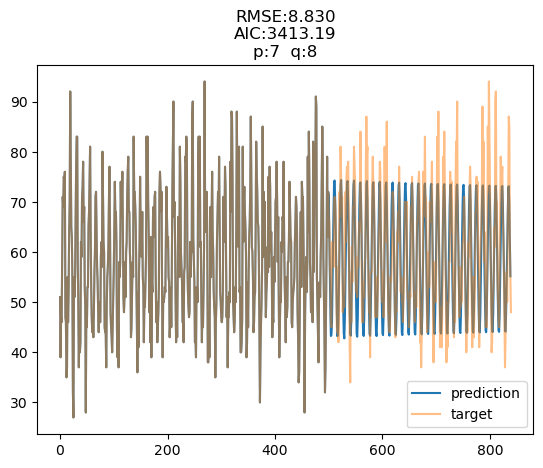

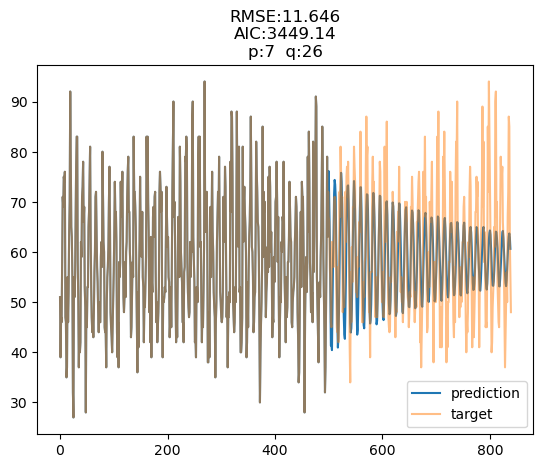

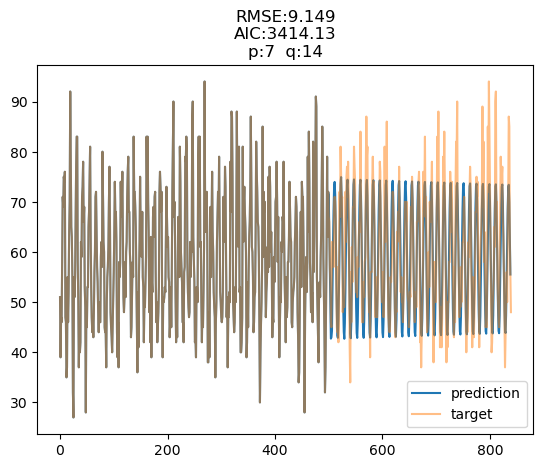

In [81]:
for i,res in enumerate(results):
    #print(res)
    pred=res['fit_model'].forecast(steps=339).values
    target=dfx.iloc[501:].values
    plt.plot(np.concatenate([dfx.iloc[:500].values,pred]),label='prediction')
    #plt.plot(model_fit2.forecast(steps=40).values)
    plt.plot(dfx.values,alpha=0.5,label='target')
    plt.legend()
    rmse=((pred-target)**2).mean()**0.5
    plt.title(f"RMSE:{rmse:.3f}\nAIC:{res['AIC']:.2f}\np:{res['P']}  q:{res['Q']}")
    plt.show()

In [93]:
dfx.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 840 entries, 1948-01-01 to 2017-12-01
Series name: None
Non-Null Count  Dtype
--------------  -----
840 non-null    int64
dtypes: int64(1)
memory usage: 13.1 KB


In [29]:
model_fit2.forecast(steps=1000)

1949-05-15    15.995005
1949-05-16    15.767309
1949-05-17    15.422281
1949-05-18    15.500710
1949-05-19    15.647223
                ...    
1952-02-04    15.440631
1952-02-05    15.440290
1952-02-06    15.439948
1952-02-07    15.439607
1952-02-08    15.439266
Freq: D, Name: predicted_mean, Length: 1000, dtype: float64

In [31]:
transformed_X.iloc[:1000]

DATE
1948-01-01    12.866565
1948-01-02    11.937668
1948-01-03    11.937668
1948-01-04    11.937668
1948-01-05    11.937668
                ...    
1950-09-22    16.138477
1950-09-23    15.113020
1950-09-24    14.166153
1950-09-25    14.166153
1950-09-26    14.166153
Length: 1000, dtype: float64

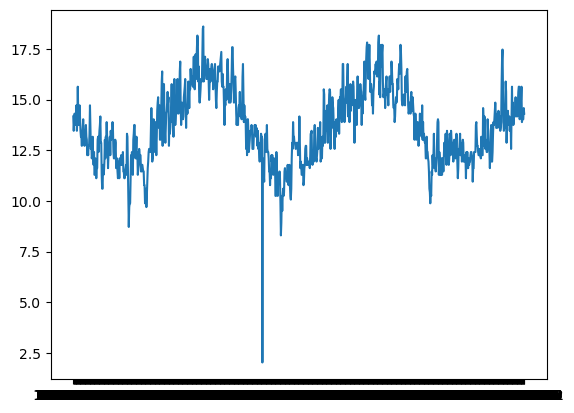

In [ ]:
model_fit2

In [45]:
model = ARIMA(df_x[col], order=(order[0], d, order[1]))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   TMAX   No. Observations:                25551
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -77845.079
Date:                Fri, 03 Jan 2025   AIC                         155702.158
Time:                        21:55:36   BIC                         155751.049
Sample:                             0   HQIC                        155717.966
                              - 25551                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5382      1.232     48.324      0.000      57.123      61.953
ar.L1          1.6177      0.008    207.934      0.000       1.602       1.633
ar.L2         -0.7300      0.010    -71.023      0.0

In [46]:
params = model_fit.params
p_values = model_fit.pvalues
print("Estimated Parameters:")
print(params)
print("P-values:")
print(p_values)

Estimated Parameters:
const     59.538225
ar.L1      1.617670
ar.L2     -0.730025
ar.L3      0.108723
ma.L1     -0.866931
sigma2    25.928145
dtype: float64
P-values:
const     0.000000e+00
ar.L1     0.000000e+00
ar.L2     0.000000e+00
ar.L3     3.543158e-63
ma.L1     0.000000e+00
sigma2    0.000000e+00
dtype: float64


In [47]:
significant_params = p_values[p_values < 0.05]
print(f"Significant parameters: {significant_params}")

Significant parameters: const     0.000000e+00
ar.L1     0.000000e+00
ar.L2     0.000000e+00
ar.L3     3.543158e-63
ma.L1     0.000000e+00
sigma2    0.000000e+00
dtype: float64


In [48]:
ljung_box = acorr_ljungbox(model_fit.resid, return_df=True)
print("Ljung-Box Test:")
print(ljung_box)


Ljung-Box Test:
      lb_stat  lb_pvalue
1    0.003495   0.952857
2    0.030129   0.985048
3    0.081494   0.993962
4    1.991915   0.737246
5    1.995276   0.849798
6    4.115127   0.661100
7    8.611171   0.281790
8   12.134183   0.145317
9   12.699805   0.176667
10  13.308455   0.206933


In [89]:
best_model=results[17]['fit_model']

In [90]:
shapiro_test = shapiro(best_model.resid)
kstest_test = kstest(best_model.resid, 'norm')
print(f"Shapiro-Wilk Test: Statistic={shapiro_test[0]}, P-value={shapiro_test[1]}")
print(f"Kolmogorov-Smirnov Test: Statistic={kstest_test[0]}, P-value={kstest_test[1]}")


Shapiro-Wilk Test: Statistic=0.9796866080893963, P-value=1.921387980102454e-06
Kolmogorov-Smirnov Test: Statistic=0.3979974290474534, P-value=5.866849528814661e-72


In [50]:
forecast = model_fit.forecast(steps=1000)
actual = df_x[col][-1000:]
rmse = np.sqrt(mean_squared_error(actual, forecast))
print(f"RMSE: {rmse}")

RMSE: 14.984445736410244


<Axes: >

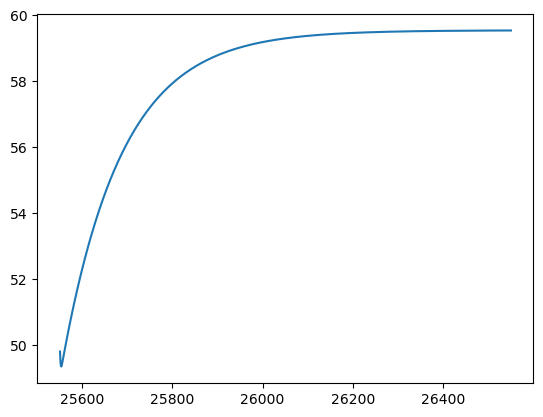

In [51]:
forecast.plot()

<Axes: >

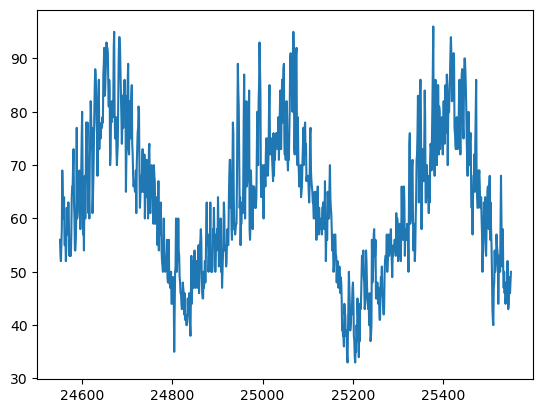

In [53]:
df_x[col][-1000:].plot()